# 0. Setup

In [138]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Stock

In [2]:
df = pd.read_csv("SWBI.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,9.938509,10.338201,9.892390,10.261337,9.733604,1823352
1,2018-01-03,10.261337,10.338201,9.315911,9.331284,8.851383,4402584
2,2018-01-04,9.331284,9.508071,9.093005,9.485012,8.997206,3080378
3,2018-01-05,9.454266,9.654112,9.362029,9.508071,9.019078,1420302
4,2018-01-08,9.500384,9.500384,9.185242,9.292852,8.814929,1835581


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       502 non-null    object 
 1   Open       502 non-null    float64
 2   High       502 non-null    float64
 3   Low        502 non-null    float64
 4   Close      502 non-null    float64
 5   Adj Close  502 non-null    float64
 6   Volume     502 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [4]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2018-01-02,9.938509,10.338201,9.892390,10.261337,9.733604,1823352,1,2018
1,2018-01-03,10.261337,10.338201,9.315911,9.331284,8.851383,4402584,1,2018
2,2018-01-04,9.331284,9.508071,9.093005,9.485012,8.997206,3080378,1,2018
3,2018-01-05,9.454266,9.654112,9.362029,9.508071,9.019078,1420302,1,2018
4,2018-01-08,9.500384,9.500384,9.185242,9.292852,8.814929,1835581,1,2018


In [5]:
print(df.shape)

(502, 9)


In [6]:
df_clean = df[['Year','Month','Close']]
df_clean.head()

,Year,Month,Close
0,2018,1,10.261337
1,2018,1,9.331284
2,2018,1,9.485012
3,2018,1,9.508071
4,2018,1,9.292852


### Music

In [186]:
df_music = pd.read_csv("clean_music_file.csv")
df_music.head()

,date,position,track,title,artist,Country,Uri,Album/Single,Genre,Artist_followers,...,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,key_notes
0,05/11/2020,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
1,04/11/2020,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
2,03/11/2020,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
3,02/11/2020,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C
4,01/11/2020,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,C


In [189]:
df_music = df_music[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]
df_music.head()

,date,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,...,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,05/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
new_date = []
for x in df_music['date']:
    date = x[3] + x[4] + x[2] + x[0] + x[1] + x[5] + x[6] + x[7] + x[8] + x[9]
    new_date.append(date)

In [191]:
df_music['clean_date'] = new_date
df_music.head()

,date,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,...,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,clean_date
0,05/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/05/2020
1,04/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2020
2,03/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/03/2020
3,02/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/02/2020
4,01/11/2020,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/01/2020


In [192]:
df_music_clean = df_music.drop('date', axis=1)
df_music_clean.head()

,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,speechiness,...,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,clean_date
0,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/05/2020
1,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2020
2,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/03/2020
3,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/02/2020
4,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/01/2020


In [193]:
df_music_clean['Month'] = pd.DatetimeIndex(df_music_clean['clean_date']).month
df_music_clean['Year'] = pd.DatetimeIndex(df_music_clean['clean_date']).year
df_music_clean.head()

,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,speechiness,...,fear,joy,sadness,surprise,trust,negative,positive,clean_date,Month,Year
0,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/05/2020,11,2020
1,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2020,11,2020
2,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/03/2020,11,2020
3,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/02/2020,11,2020
4,1.0,positions,dance pop,True,0.737,0.802,0,-4.771,1,0.0878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/01/2020,11,2020


In [194]:
df_music_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270108 entries, 0 to 270107
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   position          270108 non-null  float64
 1   title             270108 non-null  object 
 2   Genre             270108 non-null  object 
 3   Explicit          270108 non-null  bool   
 4   danceability      270108 non-null  float64
 5   energy            270108 non-null  float64
 6   key               270108 non-null  int64  
 7   loudness          270108 non-null  float64
 8   mode              270108 non-null  int64  
 9   speechiness       270108 non-null  float64
 10  acoustics         270108 non-null  float64
 11  instrumentalness  270108 non-null  float64
 12  liveliness        270108 non-null  float64
 13  valence           270108 non-null  float64
 14  tempo             270108 non-null  float64
 15  anger             203956 non-null  float64
 16  anticipation      20

In [195]:
df_music_final = df_music_clean[['title', 'Month', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]
df_music_final.head()

,title,Month,Year,tempo,valence,key,danceability,energy
0,positions,11,2020,144.015,0.682,0,0.737,0.802
1,positions,11,2020,144.015,0.682,0,0.737,0.802
2,positions,11,2020,144.015,0.682,0,0.737,0.802
3,positions,11,2020,144.015,0.682,0,0.737,0.802
4,positions,11,2020,144.015,0.682,0,0.737,0.802


# 1. Create DFs for Each Month

### 2018

#### Stock

In [196]:
jan_18 = df_clean.loc[(df_clean['Month']==1) & (df_clean['Year']==2018),:]
feb_18 = df_clean.loc[(df_clean['Month']==2) & (df_clean['Year']==2018),:]
mar_18 = df_clean.loc[(df_clean['Month']==3) & (df_clean['Year']==2018),:]
apr_18 = df_clean.loc[(df_clean['Month']==4) & (df_clean['Year']==2018),:]
may_18 = df_clean.loc[(df_clean['Month']==5) & (df_clean['Year']==2018),:]
jun_18 = df_clean.loc[(df_clean['Month']==6) & (df_clean['Year']==2018),:]
jul_18 = df_clean.loc[(df_clean['Month']==7) & (df_clean['Year']==2018),:]
aug_18 = df_clean.loc[(df_clean['Month']==8) & (df_clean['Year']==2018),:]
sep_18 = df_clean.loc[(df_clean['Month']==9) & (df_clean['Year']==2018),:]
octo_18 = df_clean.loc[(df_clean['Month']==10) & (df_clean['Year']==2018),:]
nov_18 = df_clean.loc[(df_clean['Month']==11) & (df_clean['Year']==2018),:]
dec_18 = df_clean.loc[(df_clean['Month']==12) & (df_clean['Year']==2018),:]

### 2019

#### Stock

In [198]:
jan_19 = df_clean.loc[(df_clean['Month']==1) & (df_clean['Year']==2019),:]
feb_19 = df_clean.loc[(df_clean['Month']==2) & (df_clean['Year']==2019),:]
mar_19 = df_clean.loc[(df_clean['Month']==3) & (df_clean['Year']==2019),:]
apr_19 = df_clean.loc[(df_clean['Month']==4) & (df_clean['Year']==2019),:]
may_19 = df_clean.loc[(df_clean['Month']==5) & (df_clean['Year']==2019),:]
jun_19 = df_clean.loc[(df_clean['Month']==6) & (df_clean['Year']==2019),:]
jul_19 = df_clean.loc[(df_clean['Month']==7) & (df_clean['Year']==2019),:]
aug_19 = df_clean.loc[(df_clean['Month']==8) & (df_clean['Year']==2019),:]
sep_19 = df_clean.loc[(df_clean['Month']==9) & (df_clean['Year']==2019),:]
octo_19 = df_clean.loc[(df_clean['Month']==10) & (df_clean['Year']==2019),:]
nov_19 = df_clean.loc[(df_clean['Month']==11) & (df_clean['Year']==2019),:]
dec_19 = df_clean.loc[(df_clean['Month']==12) & (df_clean['Year']==2019),:]

# 2. Stats for Each Month - Stock

### 2.1 Average Closing Price

In [200]:
df_mean = df_clean.groupby(['Month','Year']).mean().reset_index()
df_mean = df_mean.rename(columns={"Close":"Mean Closing Price"})
df_mean.head()

,Month,Year,Mean Closing Price
0,1,2018,9.403389
1,1,2019,9.919110
2,2,2018,7.960273
3,2,2019,9.601926
4,3,2018,7.852568


In [201]:
df_mean_2 = df_mean.sort_values(["Year","Month"], ascending = True)
df_mean_2

,Month,Year,Mean Closing Price
0,1,2018,9.403389
2,2,2018,7.960273
4,3,2018,7.852568
6,4,2018,8.413308
8,5,2018,8.858920
10,6,2018,9.713041
12,7,2018,8.269829
14,8,2018,7.585804
16,9,2018,11.704357
18,10,2018,10.998229


### 2.2 p-Values

In [202]:
p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [jan_18, feb_18, mar_18, apr_18, may_18, jun_18, jul_18, aug_18, sep_18, octo_18, nov_18, dec_18,
          jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sep_19, octo_19, nov_19, dec_19]
counter = 0
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Close, second_month.Close, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_18 = months[counter]
        month_19 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_18.Close, month_19.Close, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [203]:
df_mean_2.loc[:, "p-value Previous Month"] = p_value_prior_month
df_mean_2.head()

,Month,Year,Mean Closing Price,p-value Previous Month
0,1,2018,9.403389,0.000000e+00
2,2,2018,7.960273,2.433495e-12
4,3,2018,7.852568,3.935306e-01
6,4,2018,8.413308,2.431249e-08
8,5,2018,8.858920,1.353646e-03


In [204]:
df_mean_2.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
df_mean_3 = df_mean_2.reset_index(drop=True)
df_mean_3

,Month,Year,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month
0,1,2018,9.403389,0.000000e+00,0.000000e+00
1,2,2018,7.960273,2.433495e-12,0.000000e+00
2,3,2018,7.852568,3.935306e-01,0.000000e+00
3,4,2018,8.413308,2.431249e-08,0.000000e+00
4,5,2018,8.858920,1.353646e-03,0.000000e+00
5,6,2018,9.713041,2.053389e-07,0.000000e+00
6,7,2018,8.269829,4.510980e-10,0.000000e+00
7,8,2018,7.585804,1.690760e-03,0.000000e+00
8,9,2018,11.704357,1.862596e-22,0.000000e+00
9,10,2018,10.998229,1.848291e-08,0.000000e+00


# 3. Stats for Each Month - Music

### 3.1 Average Scores

In [205]:
df_music_avg_scores = df_music_final.groupby(['Month','Year']).mean().reset_index()
df_music_avg_scores.head()

,Month,Year,tempo,valence,key,danceability,energy
0,1,2017,122.269194,0.445739,5.143550,0.681636,0.613384
1,1,2018,121.334752,0.452045,5.542623,0.712875,0.617591
2,1,2019,122.408762,0.427263,5.422756,0.726823,0.593969
3,1,2020,121.593239,0.452568,5.341500,0.716308,0.575542
4,2,2017,123.429402,0.429717,5.139799,0.684692,0.611398


In [206]:
df_music_avg_scores_2 = df_music_avg_scores.sort_values(["Year","Month"], ascending = True)
df_music_avg_scores_3 = df_music_avg_scores_2.loc[(df_music_avg_scores_2['Year']==2018)|(df_music_avg_scores_2['Year']==2019),:]
df_music_avg_scores_4 = df_music_avg_scores_3.reset_index(drop=True)
df_music_avg_scores_4

,Month,Year,tempo,valence,key,danceability,energy
0,1,2018,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,123.490716,0.445765,5.587216,0.709174,0.629488
5,6,2018,124.865443,0.447488,5.507265,0.703801,0.625334
6,7,2018,125.312722,0.424409,5.333093,0.717036,0.612107
7,8,2018,125.313587,0.424833,5.418388,0.712382,0.616659
8,9,2018,124.641441,0.426372,5.447005,0.716783,0.616159
9,10,2018,123.303754,0.432074,5.389153,0.727006,0.613353


### 3.2 Join Tables Together

In [207]:
df_full = pd.merge(df_mean_3,df_music_avg_scores_4,on=['Month','Year'])
df_full.head()

,Month,Year,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month,tempo,valence,key,danceability,energy
0,1,2018,9.403389,0.000000e+00,0.0,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,7.960273,2.433495e-12,0.0,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,7.852568,3.935306e-01,0.0,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,8.413308,2.431249e-08,0.0,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,8.858920,1.353646e-03,0.0,123.490716,0.445765,5.587216,0.709174,0.629488


# 4. Genre Counts

### 4.1 Clean Genre Info

In [208]:
df_music_clean['Genre'].unique()

array(['dance pop', 'pop rap', 'latin', 'cali rap', 'brooklyn drill',
       'pop', 'canadian hip hop', 'canadian pop', 'contemporary country',
       'deep underground hip hop', 'chicago rap',
       'north carolina hip hop', 'bedroom pop',
       'canadian contemporary r&b', 'atl hip hop', 'album rock', 'k-pop',
       'ohio hip hop', 'melodic rap', 'trap', 'australian hip hop',
       'atl trap', 'dfw rap', 'hip hop', 'n-a', 'modern alternative rock',
       'nz pop', 'electropop', 'alternative r&b', 'indie pop', 'sad rap',
       'detroit hip hop', 'reggaeton', 'rap', 'emo rap', 'florida rap',
       'bedroom soul', 'modern rock', 'conscious hip hop',
       'baton rouge rap', 'edm', 'houston rap', 'australian psych',
       'chicago drill', 'memphis hip hop', 'bmore', 'canadian latin',
       'modern indie pop', 'australian pop', 'adult standards', 'pop r&b',
       'k-pop girl group', 'east coast hip hop', 'halloween',
       'barbadian pop', 'gangster rap', 'la indie', 'french s

In [209]:
x = 0
genre_clean = []
while x < len(df_music_clean):
    current_genre = df_music_clean['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [210]:
df_genre_counts = df_music_clean[['Month','Year','title']]
df_genre_counts.loc[:, "Genre"] = genre_clean
df_genre_counts.head()

,Month,Year,title,Genre
0,11,2020,positions,Pop
1,11,2020,positions,Pop
2,11,2020,positions,Pop
3,11,2020,positions,Pop
4,11,2020,positions,Pop


In [211]:
print(df_genre_counts.shape)

(270108, 4)


In [212]:
df_genre_counts_2 = df_genre_counts.drop_duplicates()
print(df_genre_counts_2.shape)

(16512, 4)


### 4.2 Genre Counts by Month

In [213]:
df_genre_counts_3 = df_genre_counts_2.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()
df_genre_counts_3.head()

,Month,Year,Genre,title
0,1,2017,Country,5
1,1,2017,Pop,106
2,1,2017,Rap,195
3,1,2017,Rock,15
4,1,2018,Country,21


In [214]:
df_genre_counts_3 = df_genre_counts_3.rename(columns={"title":"Count"})
df_genre_counts_3 = df_genre_counts_3.loc[(df_genre_counts_3['Year']==2018)|(df_genre_counts_3['Year']==2019),:]
df_genre_counts_3.head()

,Month,Year,Genre,Count
4,1,2018,Country,21
5,1,2018,Pop,94
6,1,2018,Rap,193
7,1,2018,Rock,13
8,1,2019,Country,10


In [215]:
df_rock = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Rock',:]
df_rock_2 = df_rock.sort_values(["Year","Month"], ascending = True)

df_country = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Country',:]
df_country_2 = df_country.sort_values(["Year","Month"], ascending = True)

df_pop = df_genre_counts_3.loc[(df_genre_counts_3['Genre']=='Pop'),:]
df_pop_2 = df_pop.sort_values(["Year","Month"], ascending = True)

df_rap = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Rap',:]
df_rap_2 = df_rap.sort_values(["Year","Month"], ascending = True)

df_other = df_genre_counts_3.loc[df_genre_counts_3['Genre']=='Other',:]
df_other_2 = df_other.sort_values(["Year","Month"], ascending = True)

# 5. Graphs

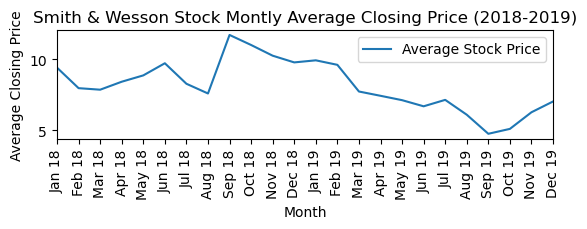

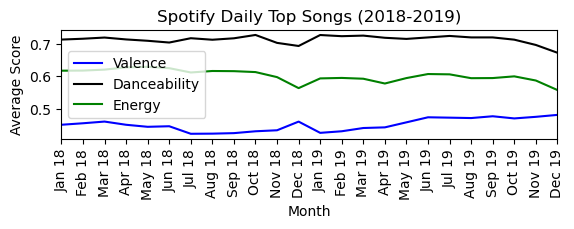

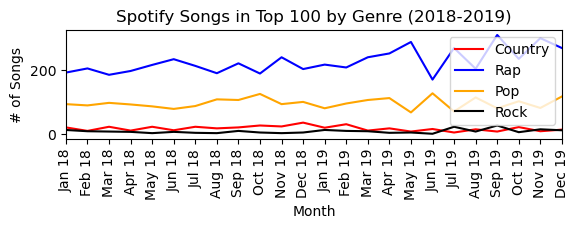

In [216]:
# All
plt.subplot(3, 1, 1)
x_axis = np.arange(1,25)
plt.plot(x_axis, df_mean_3['Mean Closing Price'],label="Average Stock Price")

plt.legend()

months = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18',
          'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19']
plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Smith & Wesson Stock Montly Average Closing Price (2018-2019)")
plt.show()

# Music All
plt.subplot(3, 1, 2)
# plt.plot(x_axis, df_music_avg_scores_3['tempo'],color="red",label="Tempo")
plt.plot(x_axis, df_music_avg_scores_3['valence'],color="blue",label="Valence")
# plt.plot(x_axis, df_music_avg_scores_3['key'],color="orange",label="Key")
plt.plot(x_axis, df_music_avg_scores_3['danceability'],color="black",label="Danceability")
plt.plot(x_axis, df_music_avg_scores_3['energy'],color="green",label="Energy")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Score")
plt.title("Spotify Daily Top Songs (2018-2019)")
plt.show()

# Genre by Month
plt.subplot(3, 1, 3)
plt.plot(x_axis, df_country['Count'],color="red",label="Country")
plt.plot(x_axis, df_rap['Count'],color="blue",label="Rap")
plt.plot(x_axis, df_pop['Count'],color="orange",label="Pop")
plt.plot(x_axis, df_rock['Count'],color="black",label="Rock")
# plt.plot(x_axis, df_other['Count'],color="green",label="Other")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("# of Songs")
plt.title("Spotify Songs in Top 100 by Genre (2018-2019)")
plt.show()

In [217]:
def regression_line(x_values, y_values, y_name, counter, title, graphs):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    #source:https://stackoverflow.com/questions/485789/why-do-i-get-typeerror-cant-multiply-sequence-by-non-int-of-type-float
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.subplot(graphs, 1, counter)
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel("Average Closing Price")
    plt.ylabel(y_name)
    plt.title(f"Closing Price vs. {title} (2018-2019)")
    
    x_mean = x_values.mean()
    y_mean = y_values.mean()
    plt.annotate(line_eq,(x_mean,y_mean),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.show()

The r-value is: 0.29307387780982846


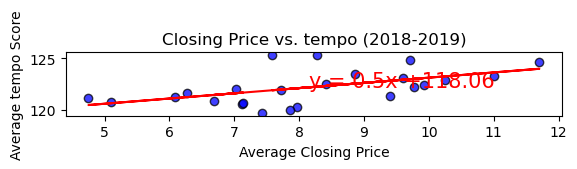

The r-value is: 0.5297921339436812


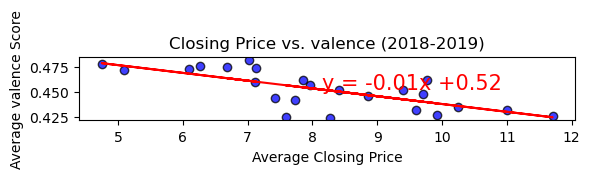

The r-value is: 0.05602947119708902


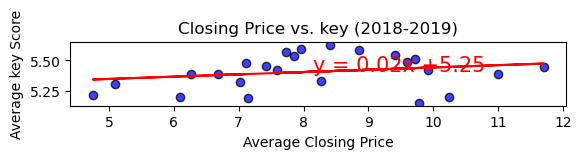

The r-value is: 0.003949421381538337


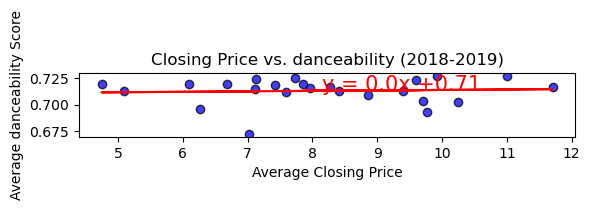

The r-value is: 0.06362583327620434


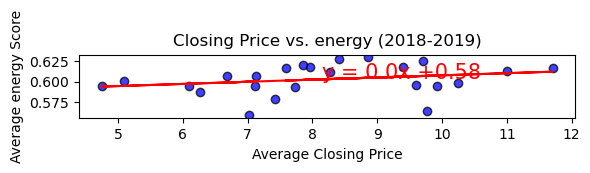

In [218]:
parameters = ['tempo', 'valence', 'key', 'danceability', 'energy']
counter = 1
for x in parameters:
    x_axis = df_full['Mean Closing Price']
    y_axis = df_full[x]
    y_name = (f"Average {x} Score")

    regression_line(x_axis, y_axis, y_name,counter, x, len(parameters))
    counter+=1

The r-value is: 0.2404370990056194


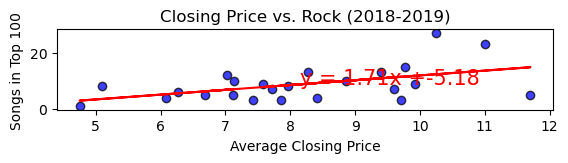

The r-value is: 0.2569672423676602


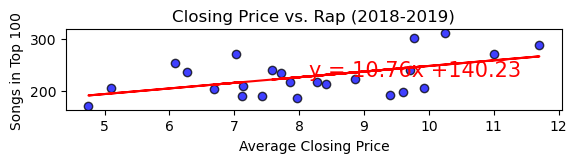

The r-value is: 0.6252454500420633


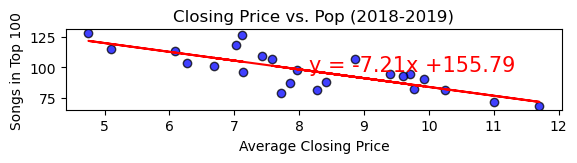

The r-value is: 0.21318627519188005


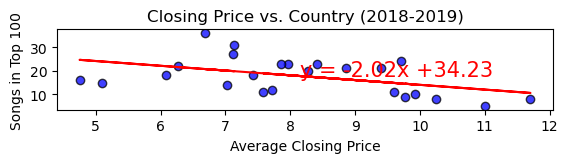

In [219]:
genres = ['Rock', 'Rap', 'Pop', 'Country']
data = [df_rock_2, df_rap_2, df_pop_2, df_country_2]
counter = 1
genre_counter = 0
for x in data:
    x_axis = df_full['Mean Closing Price']
    y_axis = x['Count']
    genre = genres[genre_counter]
    y_name = ("Songs in Top 100")

    regression_line(x_axis, y_axis, y_name,counter,genre,len(data))
    counter+=1
    genre_counter+=1